# Import

In [1]:
import os
import numpy as np
import pandas as pd
import spacy

import matplotlib.pyplot as plt
import seaborn as sns

sns.set
%matplotlib inline

# Load the dataset

Head
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
_____________________________________________________________________________
Shape
(2000, 2)
_____________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
review       2000 non-null object
sentiment    2000 non-null object
dtypes: object(2)
memory usage: 31.4+ KB
None


,review,sentiment
count,2000,2000
unique,2000,2
top,Perfect movies are rare. Even my favorite film...,positive
freq,1,1005


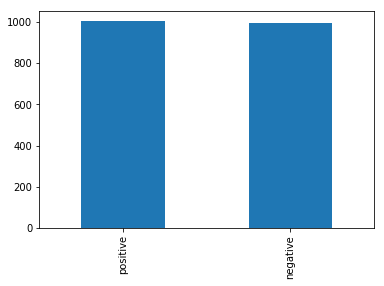

In [2]:
imdb_data=pd.read_csv('IMDBDataset.csv')

df_train=imdb_data[:2000]

print("Head")
print(df_train.head())
print("_____________________________________________________________________________")
print("Shape")
print(df_train.shape)
print("_____________________________________________________________________________")
print(df_train.info())

df_train['sentiment'].value_counts().plot(kind='bar');
df_train.describe()

The data is clean, there is no Naan values

# Preprocessing

## Tokenizing

Creation of a tokenize's function permitting to automatically tokenize our train and test set

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def tokenize(data):
    corpus = [word_tokenize(token) for token in data]
    lowercase_train = [[token.lower() for token in doc] for doc in corpus]
    alphas = [[token for token in doc if token.isalpha()] for doc in lowercase_train]
    stop_words = stopwords.words('english')
    train_no_stop = [[token for token in doc if token not in stop_words] for doc in alphas]
    stemmer = PorterStemmer()
    stemmed = [[stemmer.stem(token) for token in doc] for doc in train_no_stop]
    train_clean_str = [ ' '.join(doc) for doc in stemmed]
    return train_clean_str

In [4]:
X_train=imdb_data.review[:2000]
y_train=imdb_data.sentiment[:2000]

X_train = tokenize(X_train)

X_test2=imdb_data.review[40000:45000]
y_test2=imdb_data.sentiment[40000:45000]

X_test2 = tokenize(X_test2)
y_test2 = y_test2.values.tolist()

X_train[1]

'wonder littl product br br film techniqu fashion give comfort sometim discomfort sens realism entir piec br br actor extrem well michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life br br realism realli come home littl thing fantasi guard rather use tradit techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

# Machine Learning

## Preprocessing

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(stop_words='english')

## Machine learning models

### MultinomialNB

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
pipe = Pipeline([('vectorizer', cvec), ('mnb', mnb)])

y_train=y_train.values.tolist()
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


cm = confusion_matrix(y_train, y_pred)
accuracy = accuracy_score(y_pred, y_train)

print(cm)
print("Accuracy :" , accuracy)

cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()

cr = classification_report(y_train, y_pred)
print(cr, cv)

[[990   5]
 [ 59 946]]
Accuracy : 0.968
              precision    recall  f1-score   support

    negative       0.94      0.99      0.97       995
    positive       0.99      0.94      0.97      1005

   micro avg       0.97      0.97      0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000
 0.809793093779436


# Semi Supervised 

In [8]:
iterasi=1
acc_train=[]
acc_test=[]
acc_test2=[]

seed=1.10
data_total=len(X_train)
data_iter=int(seed*data_total)

In [9]:

print(data_total)
print(data_iter)


y_pred_fromtrain=pipe.predict(X_train)
cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()
cr = classification_report(y_pred_fromtrain, y_train)
cm = confusion_matrix(y_train, y_pred_fromtrain)
accuracy = accuracy_score(y_pred_fromtrain, y_train)
acc_train.append(accuracy)
print("\nTrain Data=",len(X_train),len(y_train))
print("Predicton from train data model ke-",iterasi)
print("\nCross validation score:",cv,"\n",cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")


X_test=imdb_data.review[data_total:data_iter]
y_test=imdb_data.sentiment[data_total:data_iter]

pipe.fit(X_train,y_train)

print("Train Data=",len(X_train),len(y_train))
print("Test Data=",len(X_test),len(y_test))

y_test=y_test.values.tolist()
X_test=tokenize(X_test)
y_pred=pipe.predict(X_test)

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_pred, y_test)
acc_test.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")

y_pred_fromtest2=pipe.predict(X_test2)
cr = classification_report(y_test2, y_pred_fromtest2)
cm = confusion_matrix(y_test2, y_pred_fromtest2)
accuracy = accuracy_score(y_pred_fromtest2, y_test2)
acc_test2.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")





iterasi=iterasi+1


prob=pipe.predict_proba(X_test)
prob_sum=[]
for data in range (0,len(prob)):
    prob_sum.append(prob[data][0]-prob[data][1])

for data in range (0,len(X_test)) :
    
    if (abs(prob_sum[data])) > 0.99 :
        X=X_test[data]
        y=y_pred[data]
        X_train.append(X)
        y_train.append(y)
        
print(len(X_train),len(y_train))

data_total=data_iter
data_iter=int(seed*data_total)

2000
2200

Train Data= 2000 2000
Predicton from train data model ke- 1

Cross validation score: 0.809793093779436 
               precision    recall  f1-score   support

    negative       0.99      0.94      0.97      1049
    positive       0.94      0.99      0.97       951

   micro avg       0.97      0.97      0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000


Confusion Matrix : 
 [[990   5]
 [ 59 946]]
Accuracy : 0.968
__________________________________________________________________________________________________
Train Data= 2000 2000
Test Data= 200 200
prediction from test data, model ke- 1
              precision    recall  f1-score   support

    negative       0.77      0.82      0.80        88
    positive       0.85      0.81      0.83       112

   micro avg       0.81      0.81      0.81       200
   macro avg       0.81      0.82      0.81       200
weighted avg       0.82      0.81      0.82 

In [10]:
while data_total < 10000 :

    print(data_total,data_iter,len(X_train))


    y_pred_fromtrain=pipe.predict(X_train)
    cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()
    cr = classification_report(y_pred_fromtrain, y_train)
    cm = confusion_matrix(y_train, y_pred_fromtrain)
    accuracy = accuracy_score(y_pred_fromtrain, y_train)
    acc_train.append(accuracy)
    print("\nTrain Data=",len(X_train),len(y_train))
    print("Predicton from train data model ke-",iterasi)
    print("\nCross validation score:",cv,"\n",cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")


    X_test=imdb_data.review[data_total:data_iter]
    y_test=imdb_data.sentiment[data_total:data_iter]

    pipe.fit(X_train,y_train)

    print("Train Data=",len(X_train),len(y_train))
    print("Test Data=",len(X_test),len(y_test))

    y_test=y_test.values.tolist()
    X_test=tokenize(X_test)
    y_pred=pipe.predict(X_test)

    cr = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_pred, y_test)
    acc_test.append(accuracy)
    print("prediction from test data, model ke-",iterasi)
    print(cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")
    
    y_pred_fromtest2=pipe.predict(X_test2)
    cr = classification_report(y_test2, y_pred_fromtest2)
    cm = confusion_matrix(y_test2, y_pred_fromtest2)
    accuracy = accuracy_score(y_pred_fromtest2, y_test2)
    acc_test2.append(accuracy)
    print("prediction from test data, model ke-",iterasi)
    print(cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")





    iterasi=iterasi+1


    prob=pipe.predict_proba(X_test)
    prob_sum=[]
    for data in range (0,len(prob)):
        prob_sum.append(prob[data][0]-prob[data][1])

    for data in range (0,len(X_test)) :
         if (data_total+data) < 10000:
                if (abs(prob_sum[data])) > 0.99 :
                    X=X_test[data]
                    y=y_pred[data]
                    X_train.append(X)
                    y_train.append(y)

    print(len(X_train),len(y_train))
    
    data_total=data_iter
    data_iter=int(seed*data_total)

2200 2420 2138

Train Data= 2138 2138
Predicton from train data model ke- 2

Cross validation score: 0.8211243031556338 
               precision    recall  f1-score   support

    negative       1.00      0.95      0.97      1117
    positive       0.95      1.00      0.97      1021

   micro avg       0.97      0.97      0.97      2138
   macro avg       0.97      0.97      0.97      2138
weighted avg       0.97      0.97      0.97      2138


Confusion Matrix : 
 [[1058    5]
 [  59 1016]]
Accuracy : 0.9700654817586529
__________________________________________________________________________________________________
Train Data= 2138 2138
Test Data= 220 220
prediction from test data, model ke- 2
              precision    recall  f1-score   support

    negative       0.80      0.81      0.80       111
    positive       0.80      0.79      0.80       109

   micro avg       0.80      0.80      0.80       220
   macro avg       0.80      0.80      0.80       220
weighted avg       0.


Train Data= 3107 3107
Predicton from train data model ke- 7

Cross validation score: 0.8716287733046155 
               precision    recall  f1-score   support

    negative       0.99      0.94      0.96      1695
    positive       0.93      0.99      0.96      1412

   micro avg       0.96      0.96      0.96      3107
   macro avg       0.96      0.96      0.96      3107
weighted avg       0.96      0.96      0.96      3107


Confusion Matrix : 
 [[1585   16]
 [ 110 1396]]
Accuracy : 0.9594464113292566
__________________________________________________________________________________________________
Train Data= 3107 3107
Test Data= 354 354
prediction from test data, model ke- 7
              precision    recall  f1-score   support

    negative       0.81      0.85      0.83       191
    positive       0.81      0.76      0.78       163

   micro avg       0.81      0.81      0.81       354
   macro avg       0.81      0.80      0.81       354
weighted avg       0.81      0.81   

prediction from test data, model ke- 11
              precision    recall  f1-score   support

    negative       0.74      0.84      0.79      2463
    positive       0.82      0.72      0.76      2537

   micro avg       0.78      0.78      0.78      5000
   macro avg       0.78      0.78      0.78      5000
weighted avg       0.78      0.78      0.78      5000


Confusion Matrix : 
 [[2061  402]
 [ 717 1820]]
Accuracy : 0.7762
__________________________________________________________________________________________________
4710 4710
5702 6272 4710

Train Data= 4710 4710
Predicton from train data model ke- 12

Cross validation score: 0.9014205166680643 
               precision    recall  f1-score   support

    negative       0.99      0.94      0.96      2687
    positive       0.92      0.99      0.95      2023

   micro avg       0.96      0.96      0.96      4710
   macro avg       0.95      0.96      0.96      4710
weighted avg       0.96      0.96      0.96      4710


Confus

prediction from test data, model ke- 16
              precision    recall  f1-score   support

    negative       0.70      0.81      0.75       414
    positive       0.78      0.65      0.71       420

   micro avg       0.73      0.73      0.73       834
   macro avg       0.74      0.73      0.73       834
weighted avg       0.74      0.73      0.73       834


Confusion Matrix : 
 [[337  77]
 [145 275]]
Accuracy : 0.7338129496402878
__________________________________________________________________________________________________
prediction from test data, model ke- 16
              precision    recall  f1-score   support

    negative       0.72      0.83      0.78      2463
    positive       0.81      0.69      0.75      2537

   micro avg       0.76      0.76      0.76      5000
   macro avg       0.77      0.76      0.76      5000
weighted avg       0.77      0.76      0.76      5000


Confusion Matrix : 
 [[2055  408]
 [ 781 1756]]
Accuracy : 0.7622
_________________________

# Test

In [11]:
import pprint
pp = pprint.PrettyPrinter()
    
prob=pipe.predict_proba(X_test)



prob_sum=[]
for data in range (0,len(prob)):
    prob_sum.append(prob[data][0]-prob[data][1])
    
pred=pipe.predict(X_test)

table=[]
result=[]

for i in range (0,len(X_test)) :
    if y_pred[i] == y_test[i] :
        result.append("true")

    else:
        result.append("false")
    
    table.append([result[i],pred[i],abs(prob_sum[i]),prob[i][0],prob[i][1]])

            
pp.pprint(table)
data_table=pd.DataFrame(table)
data_table
data_table.to_csv('prediction_naive_Bayes.csv')

[['true',
  'negative',
  0.9835088624347523,
  0.9917544312173563,
  0.008245568782603994],
 ['true',
  'positive',
  0.9361144353072506,
  0.03194278234637687,
  0.9680572176536274],
 ['true',
  'positive',
  0.9999275541892697,
  3.622290535814308e-05,
  0.9999637770946278],
 ['true',
  'negative',
  0.9999967244747757,
  0.9999983622373971,
  1.6377626214171077e-06],
 ['false',
  'negative',
  0.999999992940135,
  0.9999999964700805,
  3.529945613115239e-09],
 ['true',
  'positive',
  0.999999831683445,
  8.415828529483396e-08,
  0.9999999158417303],
 ['true',
  'negative',
  0.9998792738814696,
  0.9999396369407579,
  6.03630592883816e-05],
 ['false',
  'positive',
  0.9011030047335767,
  0.04944849763323186,
  0.9505515023668086],
 ['true', 'negative', 1.0, 1.0, 2.176357316970423e-27],
 ['false',
  'negative',
  0.9999404842818982,
  0.9999702421409529,
  2.9757859054665832e-05],
 ['true',
  'positive',
  0.9996593179233555,
  0.00017034103833343618,
  0.999829658961689],
 ['fals

  0.9999993348371784,
  6.651629987129793e-07],
 ['true',
  'negative',
  0.9999970654424589,
  0.9999985327212322,
  1.4672787732877526e-06],
 ['true',
  'positive',
  0.9996149752977243,
  0.00019251235113558918,
  0.9998074876488598],
 ['true',
  'positive',
  0.9999999996452964,
  1.7735217668264854e-10,
  0.9999999998226485],
 ['true',
  'negative',
  0.9999828129226651,
  0.9999914064613669,
  8.593538701742886e-06],
 ['true',
  'negative',
  0.999999999999662,
  0.9999999999998295,
  1.673679957856936e-13],
 ['false',
  'positive',
  0.9999998287073907,
  8.56462927170418e-08,
  0.9999999143536834],
 ['true',
  'positive',
  0.9999997226086919,
  1.3869564953473734e-07,
  0.9999998613043414],
 ['false',
  'negative',
  0.9998778910869336,
  0.9999389455434801,
  6.105445654651494e-05],
 ['true',
  'negative',
  0.99740846089812,
  0.9987042304490681,
  0.001295769550948152],
 ['true',
  'negative',
  0.999994342430757,
  0.999997171215363,
  2.8287846059515194e-06],
 ['false',
 

  0.9999178271768729,
  8.217282312360302e-05],
 ['true', 'negative', 0.9999999999999997, 1.0, 3.800667638067199e-16],
 ['true',
  'positive',
  0.9999999991034342,
  4.4829866342067175e-10,
  0.9999999995517328],
 ['false',
  'negative',
  0.1222420724592379,
  0.5611210362296221,
  0.43887896377038416],
 ['true', 'positive', 1.0, 4.99884192510805e-18, 1.0],
 ['true',
  'negative',
  0.9999999970159283,
  0.9999999985079739,
  1.4920455445448858e-09],
 ['true', 'negative', 0.48931898581296, 0.7446594929064417, 0.2553405070934817],
 ['false',
  'positive',
  0.9909994842563947,
  0.00450025787181345,
  0.9954997421282081],
 ['true',
  'negative',
  0.9999999543666611,
  0.9999999771833361,
  2.2816674949054877e-08],
 ['true',
  'positive',
  0.9010270873891127,
  0.04948645630545701,
  0.9505135436945698],
 ['false',
  'negative',
  0.9532992439309763,
  0.9766496219655632,
  0.023350378034586842],
 ['true',
  'positive',
  0.9999999864114486,
  6.794284967031686e-09,
  0.9999999932057

 ['true',
  'positive',
  0.9999991369458505,
  4.315270872356443e-07,
  0.9999995684729378],
 ['true',
  'positive',
  0.9999972987725704,
  1.3506137029312553e-06,
  0.9999986493862733],
 ['true', 'negative', 0.9999999999999631, 1.0, 3.6887304279590556e-14],
 ['true',
  'negative',
  0.9999999985366488,
  0.9999999992683115,
  7.316627422265339e-10],
 ['false',
  'negative',
  0.9935713576173932,
  0.9967856788086754,
  0.0032143211912821546],
 ['false',
  'negative',
  0.9999923088572457,
  0.9999961544286339,
  3.845571388248758e-06],
 ['true',
  'negative',
  0.9999999036078974,
  0.9999999518039442,
  4.819604680568468e-08],
 ['true',
  'positive',
  0.9998567406502745,
  7.162967484718643e-05,
  0.9999283703251217],
 ['false',
  'negative',
  0.9999998301041131,
  0.9999999150520615,
  8.494794845283263e-08],
 ['false',
  'negative',
  0.9979909265290112,
  0.9989954632645137,
  0.0010045367355025086],
 ['true', 'positive', 1.0, 6.293660058102167e-24, 1.0],
 ['true',
  'positive

  'positive',
  0.999912243335723,
  4.3878332137515044e-05,
  0.9999561216678605],
 ['true',
  'positive',
  0.999994661951757,
  2.6690240966633004e-06,
  0.9999973309758536],
 ['true', 'negative', 1.0, 1.0, 9.862946576931518e-18],
 ['false',
  'positive',
  0.9999989413137826,
  5.293431606347027e-07,
  0.9999994706569433],
 ['true', 'negative', 1.0, 1.0, 1.1011457908320859e-18],
 ['true', 'positive', 0.9999999999999902, 9.772206255655944e-15, 1.0],
 ['true',
  'negative',
  0.9999999999991951,
  0.9999999999996021,
  4.0698672956501683e-13],
 ['true', 'negative', 1.0, 1.0, 1.8719834111180957e-38],
 ['true',
  'negative',
  0.9999999998541499,
  0.9999999999270699,
  7.29200162035786e-11],
 ['false',
  'positive',
  0.9887963638657987,
  0.005601818067079243,
  0.994398181932878],
 ['true',
  'negative',
  0.9651867270962508,
  0.9825933635481214,
  0.017406636451870634],
 ['false',
  'positive',
  0.9999999999991047,
  4.4058338631079707e-13,
  0.9999999999995453],
 ['true', 'negat

  0.011575857986204406],
 ['true',
  'negative',
  0.9999957148852727,
  0.9999978574426438,
  2.1425573710503333e-06],
 ['true',
  'negative',
  0.9999824642310392,
  0.9999912321155313,
  8.767884492135225e-06],
 ['true', 'negative', 0.9999999999999998, 1.0, 2.533440006255543e-16],
 ['true',
  'negative',
  0.9999999999903325,
  0.9999999999951683,
  4.835837627464395e-12],
 ['true',
  'negative',
  0.9999809951989674,
  0.999990497599484,
  9.50240051657363e-06],
 ['true',
  'negative',
  0.9999999999526769,
  0.9999999999763531,
  2.3676249352813617e-11],
 ['true', 'positive', 1.0, 4.697415810024443e-19, 1.0],
 ['true', 'negative', 1.0, 1.0, 2.489988515797076e-60],
 ['false',
  'negative',
  0.8637816718405508,
  0.9318908359202726,
  0.06810916407972181],
 ['true',
  'negative',
  0.9999999997636595,
  0.9999999998818225,
  1.1816303053237433e-10],
 ['true',
  'positive',
  0.9923273551333635,
  0.0038363224333231877,
  0.9961636775666867],
 ['true',
  'negative',
  0.999997793964

 ['true',
  'positive',
  0.9999966744931157,
  1.6627534546305924e-06,
  0.9999983372465703],
 ['true',
  'positive',
  0.9999999999974861,
  1.2632988926192025e-12,
  0.9999999999987494],
 ['true',
  'negative',
  0.9997956151895963,
  0.9998978075947996,
  0.00010219240520332806],
 ['false',
  'positive',
  0.9995217875592353,
  0.0002391062203743164,
  0.9997608937796095],
 ['true', 'negative', 1.0, 1.0, 2.0304781951559917e-19],
 ['true',
  'positive',
  0.9999177318754479,
  4.113406226564341e-05,
  0.9999588659377135],
 ['true',
  'negative',
  0.9999999999972529,
  0.9999999999986358,
  1.382935084109169e-12],
 ['true', 'negative', 1.0, 1.0, 1.6577161918772932e-21],
 ['true',
  'negative',
  0.9999317273835182,
  0.9999658636917395,
  3.413630822119227e-05],
 ['true',
  'positive',
  0.45157018014077965,
  0.2742149099296143,
  0.7257850900703939],
 ['false',
  'negative',
  0.9877691110477846,
  0.9938845555239044,
  0.006115444476119769],
 ['true', 'positive', 1.0, 1.835923202

In [15]:
print("Fnal Model")

pipe.fit(X_train,y_train)


y_pred_fromtest2=pipe.predict(X_test2)
cr = classification_report(y_test2, y_pred_fromtest2)
cm = confusion_matrix(y_test2, y_pred_fromtest2)
accuracy = accuracy_score(y_pred_fromtest2, y_test2)
acc_test2.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")



len(X_train)

Fnal Model
prediction from test data, model ke- 18
              precision    recall  f1-score   support

    negative       0.72      0.83      0.77      2463
    positive       0.80      0.69      0.74      2537

   micro avg       0.76      0.76      0.76      5000
   macro avg       0.76      0.76      0.76      5000
weighted avg       0.76      0.76      0.76      5000


Confusion Matrix : 
 [[2041  422]
 [ 796 1741]]
Accuracy : 0.7564
__________________________________________________________________________________________________


8044

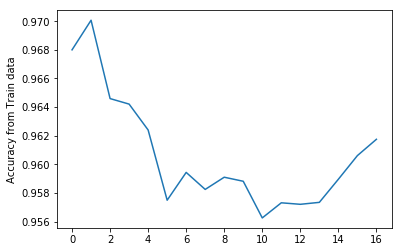

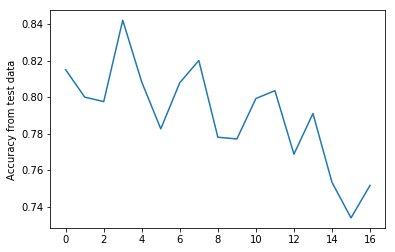

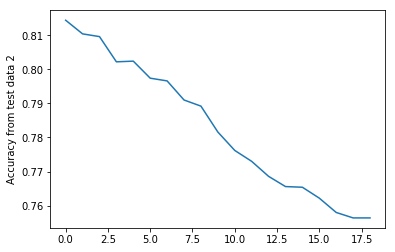

In [16]:
plt.plot(acc_train)
plt.ylabel('Accuracy from Train data')
plt.show()

plt.plot(acc_test)
plt.ylabel('Accuracy from test data')
plt.show()

plt.plot(acc_test2)
plt.ylabel('Accuracy from test data 2')
plt.show()


In [14]:
len(X_train)

8044